In [705]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [706]:
df = pd.read_csv('../dataset/data.csv')

In [707]:
ids = df['id']
df = df.drop(['id'], axis=1)

In [708]:
# df = df.sample(n=1000, random_state=42)

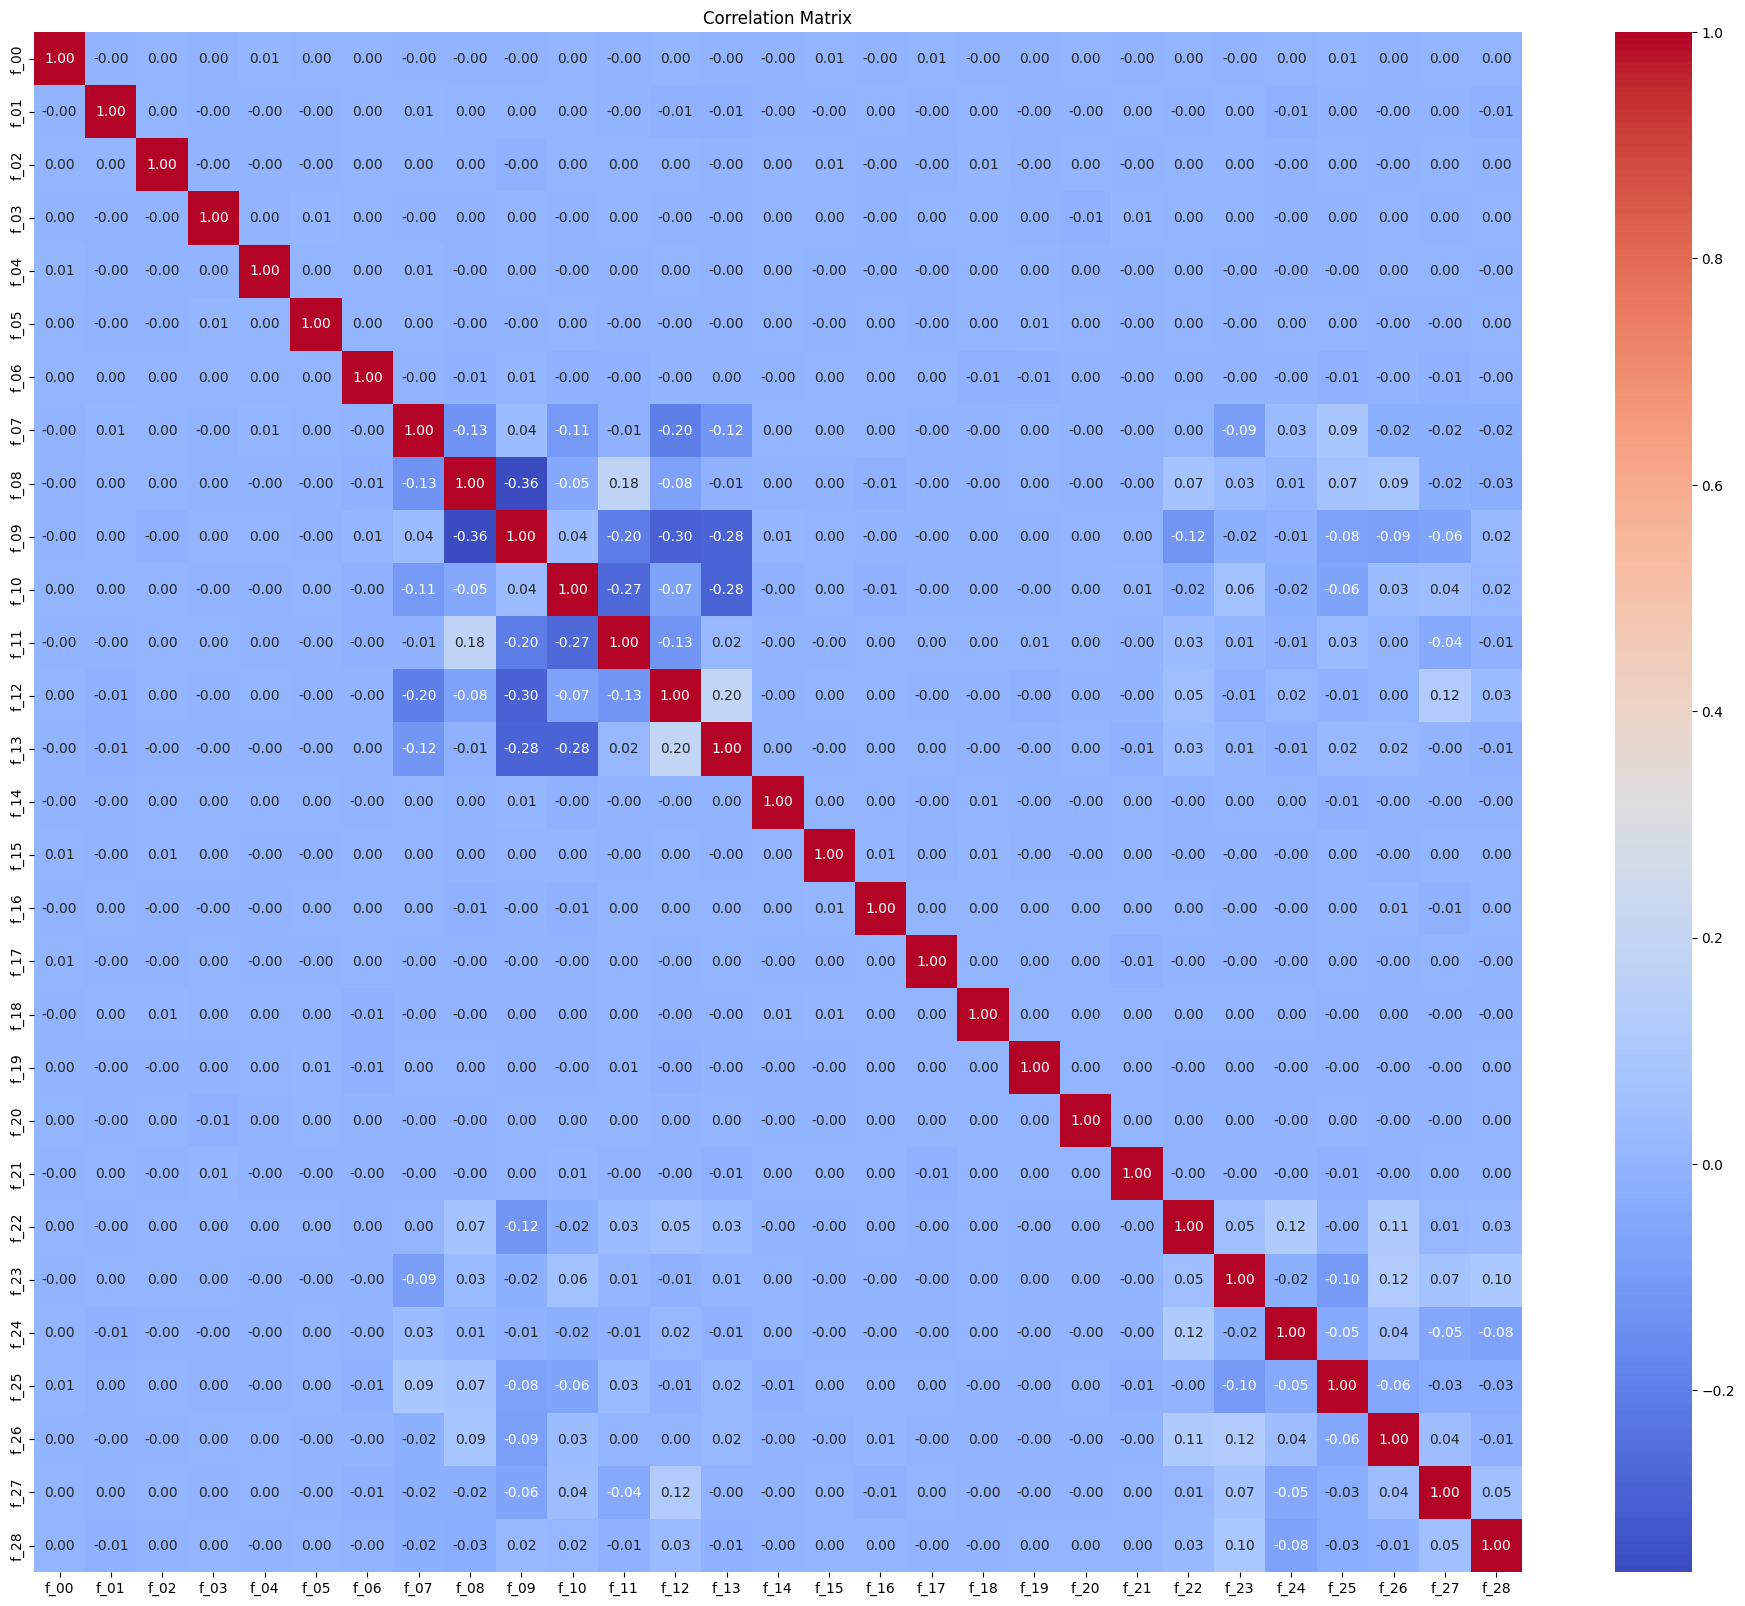

In [709]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [710]:
df = df.drop(columns=['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06',
                      'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21'])

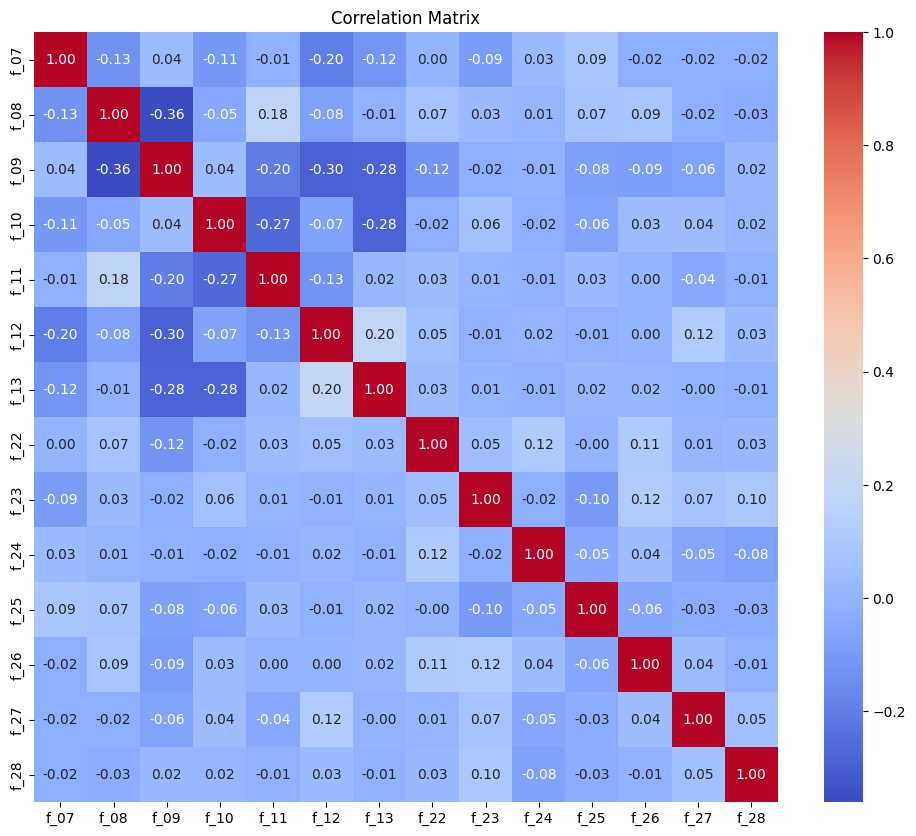

In [711]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [712]:
scaler = StandardScaler()

In [713]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
df = scaled_df

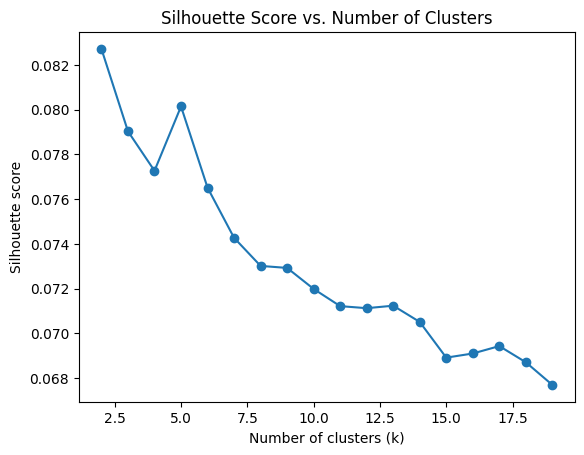

In [714]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sample_df = scaled_df.sample(n=20000, random_state=42)

silhouette_scores = []
k_values = range(2, 20)  # You can adjust the range as needed

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    kmeans.fit(sample_df)
    
    silhouette_score_k = silhouette_score(sample_df, kmeans.labels_)
    
    silhouette_scores.append(silhouette_score_k)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [715]:
kmeans = KMeans(n_clusters=5) 

kmeans.fit(df)
cluster_labels = kmeans.labels_

In [716]:
# df['Cluster'] = cluster_labels

In [717]:
df

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.960479,1.502035,0.983395,-0.650584,1.171053,-0.242797,-0.069441,-0.711585,0.911572,-0.680948,0.762783,0.960482,1.045296,0.683323
1,-0.960479,-0.906254,-0.371415,-0.863341,-0.496771,2.012866,0.658704,-0.541815,0.454693,1.032386,-0.133948,-0.552942,0.355435,-1.602671
2,-0.147872,1.020377,-0.540766,-0.012314,0.218011,-0.919496,1.144134,2.236943,0.088090,-1.513324,-0.577814,0.979171,-0.926250,-2.224327
3,0.122997,-1.147082,0.814044,-0.012314,0.218011,-0.242797,-0.554872,0.727667,-1.218753,0.825698,-1.164842,-0.397908,-0.114228,0.307002
4,0.664735,0.057062,-0.540766,-1.076098,-1.688074,1.336167,1.144134,0.218614,-1.484025,0.847369,-0.622034,1.166086,-0.385886,-1.149094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,-0.147872,0.057062,-0.032712,-0.650584,-0.258510,-0.242797,0.173274,0.952911,0.408781,1.287093,-0.091769,-0.989367,0.153191,0.442240
97996,-0.689610,0.538719,-1.048820,-0.650584,-1.211553,0.885035,1.386850,1.163371,-0.428415,0.267485,0.778516,0.138325,0.686528,0.627132
97997,0.664735,0.538719,0.305990,-0.225071,-0.735032,-0.693930,-0.797587,-0.994402,1.448745,0.866627,0.164508,1.544230,1.185513,0.570752
97998,-1.231348,0.297891,0.475341,0.625957,-1.211553,0.433902,-0.312156,0.268791,0.513515,0.685678,-0.300550,-1.084287,-0.547494,0.107754


In [718]:
cluster_df = pd.DataFrame({'id': ids, 'Predicted': cluster_labels})

cluster_df

,id,Predicted
0,0,3
1,1,0
2,2,3
3,3,1
4,4,0
...,...,...
97995,97995,0
97996,97996,0
97997,97997,4
97998,97998,1


In [719]:
cluster_df.to_csv('cluster_results.csv', index=False)